## IMPORTS

In [37]:
import pandas as pd
import sys
from matplotlib import pyplot as plt


sys.path.append('../../')
from utils import clustering_utils, bokeh_ui_utils, rna_seq_utils

In [38]:
full_filtered_df = pd.read_csv('../../active_files/rna_seq.csv')
full_filtered_norm_df = rna_seq_utils.normalize_expression_per_gene(full_filtered_df)

num_genes = full_filtered_df.shape[0]
num_genes

21524

In [39]:
full_filtered_df.sample(10)

,TTHERM_ID,000min,030min,060min,090min,120min,150min,180min,210min,240min
17417,YF00026933.t1,1.510519,1.740690,-0.199194,0.097855,-0.762849,-1.555949,-0.075291,0.037375,-0.793155
7782,YF00012229.t1,1.233047,0.871948,0.528311,0.362018,0.230127,0.680848,-0.616584,-1.670643,-1.619073
7336,YF00011380.t1,0.497349,0.697034,0.391914,1.316783,-1.051344,-1.597892,-1.334587,0.962017,0.118726
8004,YF00012597.t1,-0.324171,-1.541255,-1.482105,0.579855,1.433748,1.278262,0.460237,-0.243120,-0.161450
13307,YF00020648.t1,-0.413086,-0.897441,-1.360593,-1.149403,-0.091174,0.163306,0.954302,1.432265,1.361824
9837,YF00015397.t1,-0.692280,-1.144052,-1.506161,-0.795268,0.173279,1.028353,1.268438,1.168401,0.499290
7926,YF00012458.t1,1.198662,-1.496934,-0.951651,-0.841484,0.218236,0.860829,1.577885,0.084906,-0.650448
10209,YF00016006.t1,1.989516,-0.344859,-1.913757,-0.258378,-0.683023,-0.116299,0.714358,0.395048,0.217394
17865,YF00027674.t1,0.926005,1.118004,0.942167,1.012666,0.099884,-0.349001,-1.558256,-1.191127,-1.000344
5230,YF00007597.t1,0.513612,-0.667524,-0.935363,-1.379329,0.388455,-0.820828,1.215579,-0.103501,1.788899


In [40]:
cycle_expression_conflict_df = full_filtered_df.loc[
    (full_filtered_df['000min'] > 0.9)
    &
    (full_filtered_df['210min'] < 0.1)
    &
    (full_filtered_df['240min'] < 0.1)
]

In [41]:
cycle_expression_conflict_df

,TTHERM_ID,000min,030min,060min,090min,120min,150min,180min,210min,240min
0,YF00000001.t1,0.910193,-0.286020,-0.119706,0.893590,0.928947,0.176211,0.727746,-1.052564,-2.178396
6,YF00000011.t1,2.261305,0.620949,-1.042034,-1.259590,0.252273,-0.102887,0.330185,-0.734130,-0.326072
8,YF00000013.t1,0.935421,0.699402,-0.142884,0.016602,0.136700,1.443761,0.185203,-1.394728,-1.879477
16,YF00000023.t1,1.351731,0.149180,0.587951,-1.639571,-0.157602,1.150480,0.598685,-0.615899,-1.424954
18,YF00000028.t1,2.259856,-0.422235,-0.963075,-0.670578,0.600565,0.554869,0.164753,-0.271998,-1.252156
...,...,...,...,...,...,...,...,...,...,...
21513,YF00038363.t1,2.481030,0.516379,-0.101797,-0.486988,-0.813020,0.099809,0.032080,-1.152030,-0.575464
21515,YF00038368.t1,1.369232,-0.645802,-1.089678,-0.064023,0.125732,2.039101,-0.137823,-0.955091,-0.641647
21518,YF00038372.t1,1.034074,0.597451,-1.152814,-1.240039,-0.707393,1.968434,0.126318,-0.557980,-0.068052
21521,YF00038377.t1,2.725986,-0.627384,-0.813547,-0.394835,-0.480004,-0.116765,0.062185,-0.025355,-0.330281


In [42]:
cycle_expression_conflict_df.to_csv('./cycle_expression_conflict.csv')

### LEIDEN CLUSTERING

In [43]:
phases = 'rna_seq'

In [44]:
leiden_label_df_round_1, partition_stats, cluster_sizes, enriched_cluster_sizes =  clustering_utils.build_label_df(
    full_filtered_norm_df, 
    metric='manhattan', 
    # metric='minkowski_3.0', 
    n_neighbors=4, 
    # resolution_param=0.005, 
    resolution_param=0.050, 
    partition_type = 'EXP', 
    n_jobs = -1, 
    random_state=42
    )

In [45]:
leiden_label_df_round_1_arranged = bokeh_ui_utils.arrange_modules(full_filtered_norm_df, leiden_label_df_round_1, phases) 
leiden_label_df_round_1_arranged_sorted = leiden_label_df_round_1_arranged.sort_values(by=['label', 'TTHERM_ID'], ascending=False)
leiden_label_df_round_1_arranged_sorted.to_csv('./rna_seq_label_df_round_1.csv', index=False)

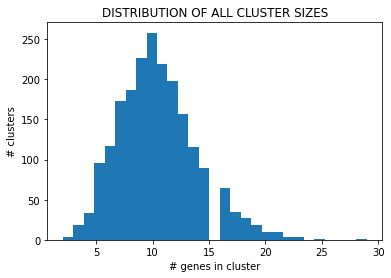

In [46]:
plt.hist(cluster_sizes, max(cluster_sizes))
plt.title('DISTRIBUTION OF ALL CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

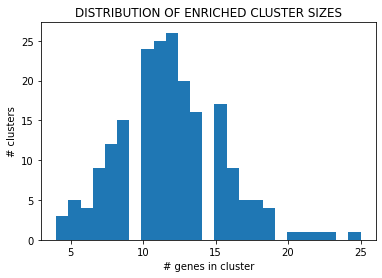

In [47]:
plt.hist(enriched_cluster_sizes, max(enriched_cluster_sizes))
plt.title('DISTRIBUTION OF ENRICHED CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

In [48]:
key_lens = [len(k) for k in partition_stats.keys()]
max_key_len = max(key_lens)

for k, v in partition_stats.items():
    print(f'{" " * (max_key_len - len(k))}{k}:', v)

              partition_type: EXP
              dimensionality: baseline
                      metric: manhattan
                       graph: umap_fuzzy_simplicial_set
                         nns: 4
                  clustering: leiden_cpm
                   parameter: 0.05
            silhouette_score: 0.02402969684854666
                  modularity: 0.6125175855434545
                   nclusters: 2063
           mean_cluster_size: 10.433349491032477
         median_cluster_size: 10.0
             sd_cluster_size: 3.5607453153359407
          nenriched_clusters: 204
  mean_enriched_cluster_size: 11.897058823529411
median_enriched_cluster_size: 12.0
    sd_enriched_cluster_size: 3.6169794537830606
     nenriched_cluster_genes: 2427
                    datetime: 2024-04-17 10:58:22.325440
